In [99]:
# importing libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [100]:
# reading the dataset

train_data_path = 'C:/Users/Neha/Desktop/Downloads/train.csv'
train_data = pd.read_csv(train_data_path)

test_data_path = 'C:/Users/Neha/Desktop/Downloads/test.csv'
test_data = pd.read_csv(test_data_path)

In [101]:
# checking for null values 

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [103]:
# dropping columns which have more than 50% null values

train_data = train_data.drop(['Cabin'],axis=1)
test_data = test_data.drop(['Cabin'],axis=1)

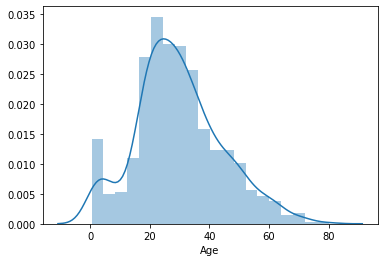

In [104]:
# plotting distribution of Age

sns.distplot(train_data['Age'])

In [105]:
# filling up null values of Age

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

In [106]:
# filling up null values of Fare and Embarked 

test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [107]:
train_data['Embarked']=train_data['Embarked'].fillna('S')

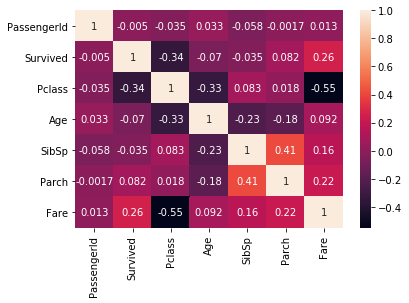

In [108]:
# plotting heatmap of numerical features

corr = train_data.corr()
sns.heatmap(corr,annot=True)

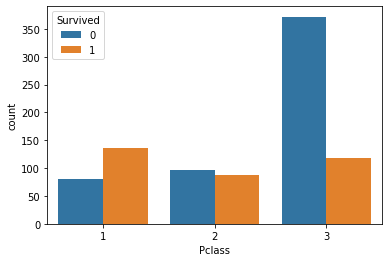

In [109]:
# plotting distribution of Sex and Pclass 

sns.countplot(x=train_data['Pclass'],hue=train_data['Survived'])

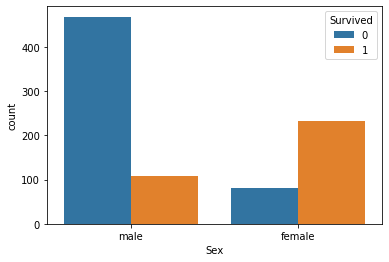

In [110]:
sns.countplot(x=train_data['Sex'],hue=train_data['Survived'])

In [111]:
# converting categorical features 

attr_list = ['Pclass','Sex','Embarked','Ticket']
for i in attr_list:
    train_data[i]=pd.get_dummies(train_data[i]) 
    test_data[i]=pd.get_dummies(test_data[i])

In [112]:
# selecting dependent and independent features 

X = train_data[['PassengerId','Age','Sex','Fare','Ticket','SibSp','Pclass','Parch']]
y = train_data[['Survived']]

In [113]:
# train_test_split 

train_X , test_X , train_y , test_y = train_test_split(X,y,test_size = 0.20,random_state=0)

In [114]:
# initialising and fitting model 

classifier = RandomForestClassifier(n_estimators=50,max_depth=3,random_state=1)
classifier.fit(train_X,train_y)
classifier.score(test_X,test_y)

C:\Users\Neha\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8044692737430168

In [115]:
# making predictions for test data 

X_test = test_data[['PassengerId','Age','Sex','Fare','Ticket','SibSp','Pclass','Parch']]
predictions = classifier.predict(X_test)

In [116]:
# saving predictions to a csv file 

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved")

Your submission was successfully saved
